In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 


In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [6]:
#split data into batches of 1000 points
batches1000 = [data[x:x+1000] for x in range(0, len(data), 1000)]
#print(len(batches1000))
#print(len(batches1000[0]))

In [7]:
#split data into batches of 10000 points
batches10000 = [data[x:x+10000] for x in range(0, len(data), 10000)]
#print(len(batches10000))
#print(len(batches10000[0]))
#print(len(batches10000[2407]))
#print(len(batches10000[2408]))

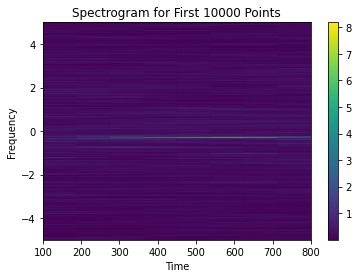

In [8]:
#spectrogram of first set of 10000 points
f, t, Sxx = signal.spectrogram(batches10000[0]-np.mean(batches10000[0]), 10, nperseg=2000, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for First 10000 Points')
plt.show()

In [9]:
#taking average of 20 sets of 10000 points 
avg10000=[]
slice0=[]

for i in range(0,10000):
    slice0.clear()
    for j in range(0,20):
        slice0.append(batches10000[j][i])
    avg10000.append(np.mean(slice0[:]))

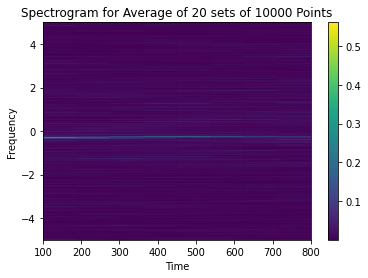

In [10]:
#spectrogram of average of first 20 sets of 10000 points
fav10000, tav10000, Sxxav10000 = signal.spectrogram(avg10000-np.mean(avg10000), 10, nperseg=2000, return_onesided=False)
plt.pcolormesh(tav10000, fftshift(fav10000), fftshift(Sxxav10000, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for Average of 20 sets of 10000 Points')
plt.show()

In [11]:
#taking average of 20 sets of 1000 points 
avg1000=[]
slice1=[]

for i in range(0,1000):
    slice1.clear()
    for j in range(0,20):
        slice1.append(batches1000[j][i])
    avg1000.append(np.mean(slice1[:]))
    
#print(len(avg20))

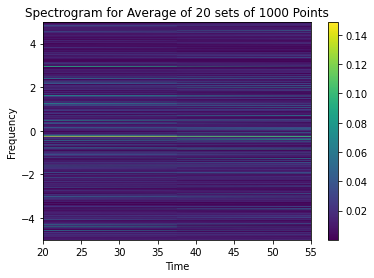

In [12]:
#spectrogram of average of first 20 sets of 1000 points
fav1000, tav1000, Sxxav1000 = signal.spectrogram(avg1000-np.mean(avg1000), 10, nperseg=400, return_onesided=False)
plt.pcolormesh(tav1000, fftshift(fav1000), fftshift(Sxxav1000, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for Average of 20 sets of 1000 Points')
plt.show()

In [13]:
#try splitting into batches of 5000 and take average of first 20
batches5000 = [data[x:x+5000] for x in range(0, len(data), 5000)]

avg5000=[]
slice2=[]

for i in range(0,5000):
    slice2.clear()
    for j in range(0,20):
        slice2.append(batches5000[j][i])
    avg5000.append(np.mean(slice2[:]))

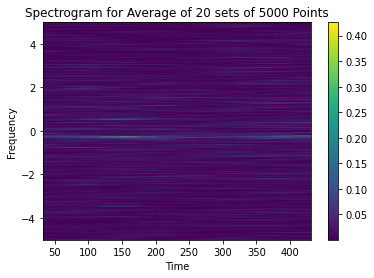

In [14]:
#spectrogram of average of first 20 sets of 5000 points
fav5000, tav5000, Sxxav5000 = signal.spectrogram(avg5000-np.mean(avg5000), 10, nperseg=650, return_onesided=False)
plt.pcolormesh(tav5000, fftshift(fav5000), fftshift(Sxxav5000, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for Average of 20 sets of 5000 Points')
plt.show()

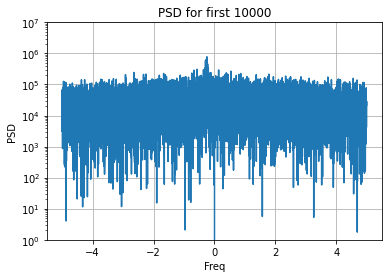

In [32]:
#PSD 
#power response is the abs value of the FFT

F10000=np.fft.fft(batches10000[0]-np.mean(batches10000[0]))

P10000 = np.square(abs(F10000))

#create s axis in Fourier plane (same size as set and with sampling freq at least max freq x2)
s=np.fft.fftfreq(10000, 0.1)
 
plt.semilogy(s,P10000)
plt.xlabel('Freq')
plt.ylabel('PSD')
plt.ylim(1,10000000)
plt.title('PSD for first 10000')
plt.grid(True)

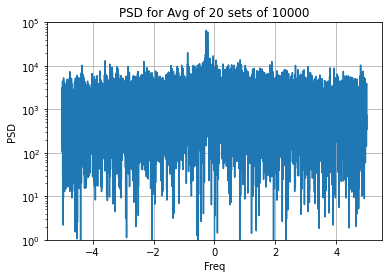

In [39]:
#PSD 
#power response is the abs value of the FFT

Fav10000=np.fft.fft(avg10000-np.mean(avg10000))

Pav10000 = np.square(abs(Fav10000))

#create s axis in Fourier plane (same size as set and with sampling freq at least max freq x2)
s=np.fft.fftfreq(10000, 0.1)
 
plt.semilogy(s,Pav10000)
plt.xlabel('Freq')
plt.ylabel('PSD')
plt.ylim(1,100000)
plt.title('PSD for Avg of 20 sets of 10000')
plt.grid(True)

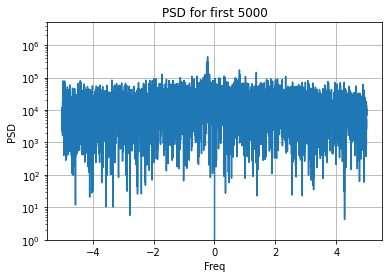

In [33]:
#PSD 
#power response is the abs value of the FFT

F5000=np.fft.fft(batches5000[0]-np.mean(batches5000[0]))

P5000 = np.square(abs(F5000))

#create s axis in Fourier plane (same size as set and with sampling freq at least max freq x2)
s=np.fft.fftfreq(5000, 0.1)
 
plt.semilogy(s,P5000)
plt.xlabel('Freq')
plt.ylabel('PSD')
plt.ylim(1,5000000)
plt.title('PSD for first 5000')
plt.grid(True)

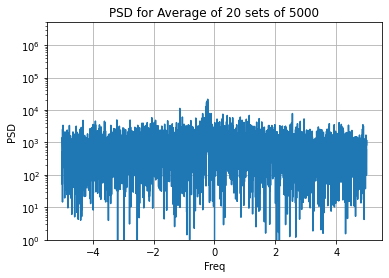

In [42]:
#PSD 
#power response is the abs value of the FFT

Fav5000=np.fft.fft(avg5000-np.mean(avg5000))

Pav5000 = np.square(abs(Fav5000))

#create s axis in Fourier plane (same size as set and with sampling freq at least max freq x2)
s=np.fft.fftfreq(5000, 0.1)
 
plt.semilogy(s,Pav5000)
plt.xlabel('Freq')
plt.ylabel('PSD')
plt.ylim(1,5000000)
plt.title('PSD for Average of 20 sets of 5000')
plt.grid(True)